<a href="https://colab.research.google.com/github/ludovina-magalhaes/Analise_Previsao_Marketing_Bancario/blob/main/An%C3%A1lise_preditiva_marketing_banc%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise e Previsão de Marketing Bancário

Este datase está relacionado com campanhas de marketing direto realizadas por uma instituição bancária portuguesa. O foco das campanhas era a promoção de depósitos a prazo, e as interações com os clientes eram feitas através de chamadas telefónicas. Muitas vezes, mais de um contacto era necessário para avaliar se o cliente iria subscrever o produto ou não. Através deste conjunto de dados, é possível analisar o comportamento dos clientes e identificar fatores que influenciam a decisão de subscrição do produto, com o objetivo de otimizar as futuras campanhas de marketing e melhorar a eficácia da abordagem. Utilizando métodos de Análise Exploratória de Dados (EDA) e Regressão Logística, buscamos identificar padrões, entender o comportamento dos clientes e prever a probabilidade de adesão, auxiliando na tomada de decisões estratégicas.

**Descrição das Variáveis**
age (Idade): Idade do cliente em anos.

**job (Trabalho)**: Tipo de ocupação do cliente.
Observação: Profissões podem influenciar a probabilidade de adesão devido a fatores como estabilidade financeira.

**marital (Estado Civil**): Estado civil do cliente.d').

**education (Educação)**: Nível educacional do cliente.

**default (Inadimplência)**: Indica se o cliente tem um crédito em inadimplência.

**balance (Saldo)**: Saldo médio anual na conta bancária do cliente (em unidades monetárias).

**housing (Empréstimo Imobiliário)**: Indica se o cliente possui um empréstimo imobiliário ativo.

**loan (Empréstimo Pessoal)**: Indica se o cliente possui um empréstimo pessoal ativo.

**contact (Tipo de Contato**): Tipo de comunicação usada na campanha.

**day (Dia)**: Dia do mês em que o cliente foi contatado.

**month (Mês)**: Mês em que o cliente foi contatado. idades nas campanhas.

**duration (Duração)**: Duração da última chamada em segundos.

**campaign (Número de Contatos na Campanha)**: Número de vezes que o cliente foi contatado durante a campanha atual.

**pdays (Dias desde o Último Contato)**: Número de dias desde que o cliente foi contatado pela última vez.

**previous (Contatos Anteriores**): Resultado da campanha anterior com o cliente.

**deposit (Depósito a Prazo - Alvo**): Indica se o cliente aderiu ao depósito a prazo.


###Importar Biblioteca e Carregar Dados

In [ ]:
# import dependencies
# data cleaning and manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [ ]:
# Carregar dados
df = pd.read_csv('/content/drive/MyDrive/Projectos/Banco Marketing/bank.csv',  sep=';', encoding='iso-8859-1')
# encoding: codificação dos caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [ ]:
# Mostrar o Arquivo
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])
df.head()

Entradas:  4521
Variáveis:  17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


###Compreender os dados

In [ ]:
# Verificar as colunas
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# Verificar as informações sobre o dataset e cada tipo de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Frequência de job
df['job'].value_counts()

,count
job,
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


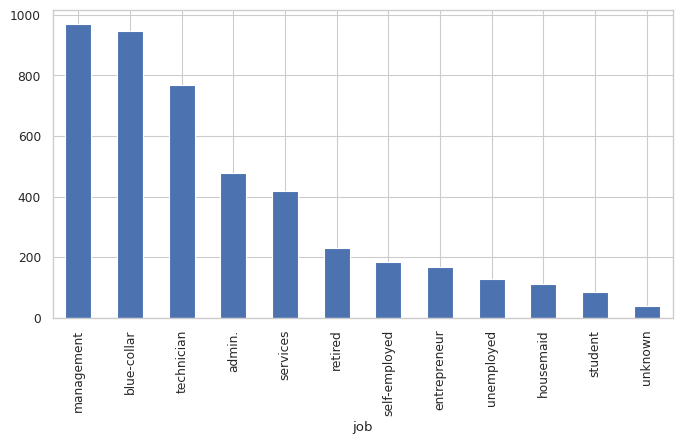

In [ ]:
# Plot da frequência d e job
sns.set_context('paper')
df['job'].value_counts().plot(kind='bar', figsize=(8,4));

Como podemos constatar que a maioria dos clientes pertence a profissões de gestão, enquanto as empregadas domésticas são em menor número, uma vez que, em geral, não realizam depósitos a prazo.

In [ ]:
# Frequência de  marital status
df['marital'].value_counts()

,count
marital,
married,2797
single,1196
divorced,528


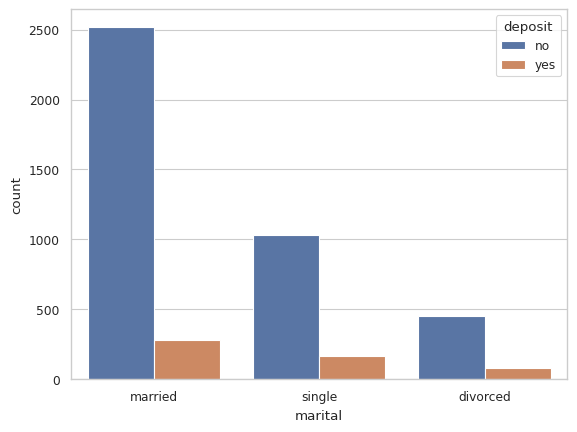

In [ ]:
# Plot da frequência entre  marital status vs deposit
sns.countplot(data=df, x = 'marital', hue = 'deposit');

<Axes: xlabel='age', ylabel='Count'>

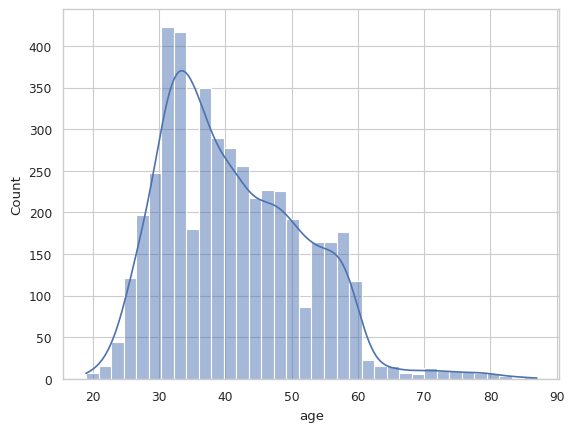

In [ ]:
# Plot da frequência de age
sns.histplot(df['age'], kde=True)

Podemos inferir que a maioria dos clientes se encontra na faixa etária entre os 20 e os 60 anos.

In [ ]:
# Frequência  entre job vs deposit

print(pd.crosstab(df['job'],df['deposit']))

deposit         no  yes
job                    
admin.         420   58
blue-collar    877   69
entrepreneur   153   15
housemaid       98   14
management     838  131
retired        176   54
self-employed  163   20
services       379   38
student         65   19
technician     685   83
unemployed     115   13
unknown         31    7


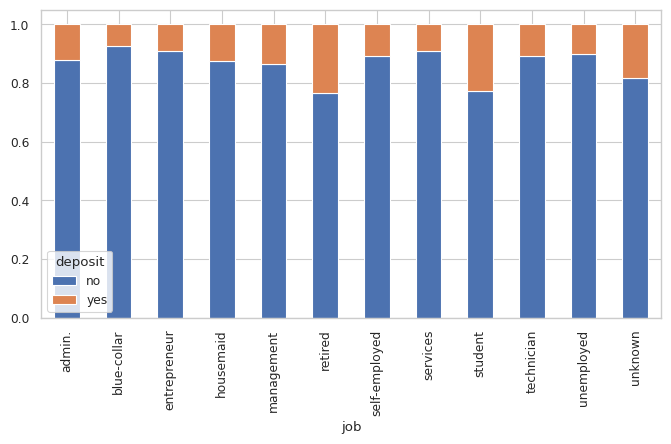

In [ ]:
# Plot da frequência de deposit
job = pd.crosstab(df['job'],df['deposit'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,4));

A partir do gráfico acima, podemos concluir que os students e os retired  têm maiores probabilidades de realizar depósitos.








In [ ]:
# Frequência entre Marital status vs deposit
print(pd.crosstab(df['marital'],df['deposit']))

deposit     no  yes
marital            
divorced   451   77
married   2520  277
single    1029  167


In [ ]:
# Frequência entre Marital status vs deposit em percentagem
marital = pd.crosstab(df['marital'], df['deposit'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)

# Exibir com 3 casas decimais
marital_norm_percent = marital_norm * 100  # Converter para porcentagem
marital_norm_percent = marital_norm_percent.round(3)  # Arredondar para 3 casas decimais

print(marital_norm_percent)


deposit       no     yes
marital                 
divorced  85.417  14.583
married   90.097   9.903
single    86.037  13.963


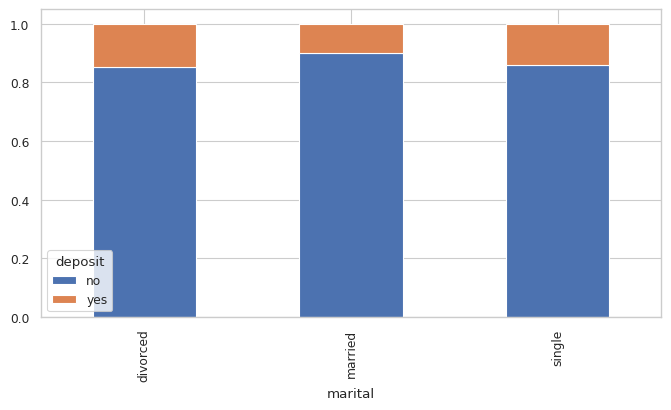

In [ ]:
# Plot da frequência entre Marital status vs deposit em percentagem %
marital_norm.plot.bar(stacked=True, figsize=(8,4));

Como podemos verificar atraves do grafico, pode-se observar que a tendência de pessoas solteiras(single) e divorciados(divorced) a depositar dinheiro é maior que o outro status.

In [ ]:
# Frequência entre Default vs Deposit
print(pd.crosstab(df['default'],df['deposit']))

deposit    no  yes
default           
no       3933  512
yes        67    9


In [ ]:
# Frequência entre Default vs Deposit em percentagem
marital = pd.crosstab(df['default'], df['deposit'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)

# Exibir com 3 casas decimais
marital_norm_percent = marital_norm * 100  # Converter para porcentagem
marital_norm_percent = marital_norm_percent.round(3)  # Arredondar para 3 casas decimais

print(marital_norm_percent)

deposit      no     yes
default                
no       88.481  11.519
yes      88.158  11.842


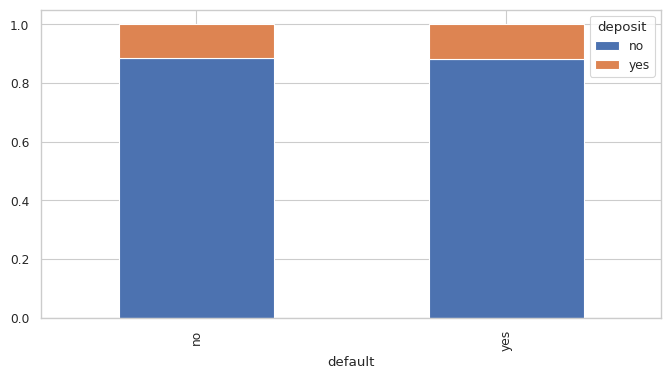

In [ ]:
# Plot da frequência entre Default vs Deposit em percentagem %
marital_norm.plot.bar(stacked=True, figsize=(8,4));

Como estamos a ver podemos concluir que os clientes  que não têm  histórico de inadimplência tem ligeiramente a mesma  chances de fazer o depósito num empréstimo a prazo  que os clientes que possuem histórico de inadimplência.

In [ ]:
# Frequência  da contagem de deposit
df['deposit'].value_counts()

,count
deposit,
no,4000
yes,521


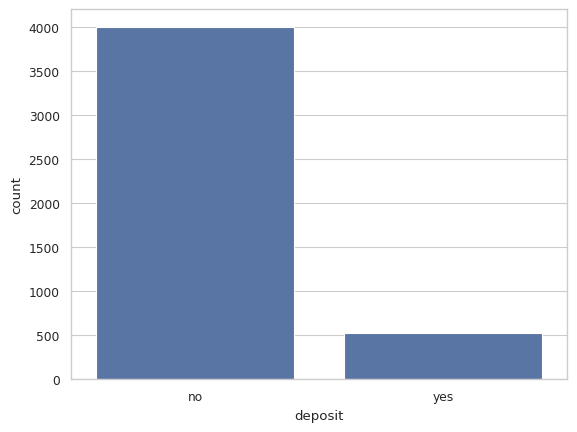

<Figure size 800x400 with 0 Axes>

In [ ]:
# Plot da frequência de deposit
sns.countplot(data=df, x = "deposit");
plt.figure(figsize=(8, 4))
plt.show()

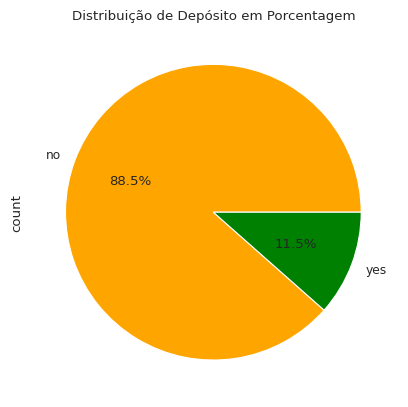

In [ ]:
# Porcentagem de depósito
deposit_counts = df['deposit'].value_counts()
deposit_counts.plot(
    kind='pie',
    autopct='%.1f%%',
    colors=['orange', 'green']
)
plt.title("Distribuição de Depósito em Porcentagem")
plt.show()


Podemos ver que o conjunto de dados não está equilibrado.

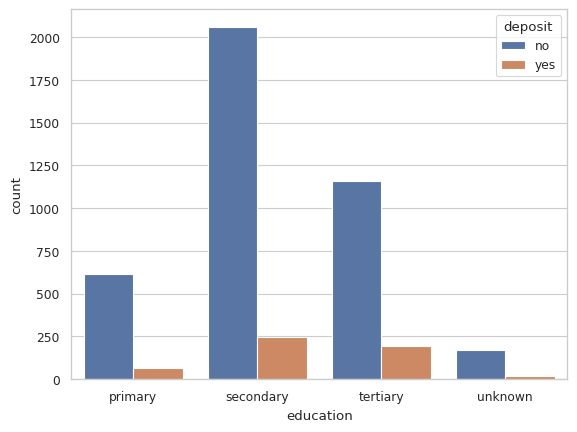

In [ ]:
# Plot da frequência entre Default vs Deposit em percentagem %
sns.countplot(data=df, x = 'education', hue = 'deposit');

Como podemos verificar todos os níveis de educação apresenta uma proporção dispostos a depositar o dinheiro.

In [ ]:
# Frequência  da contagem de contact
df['contact'].value_counts()

,count
contact,
cellular,2896
unknown,1324
telephone,301


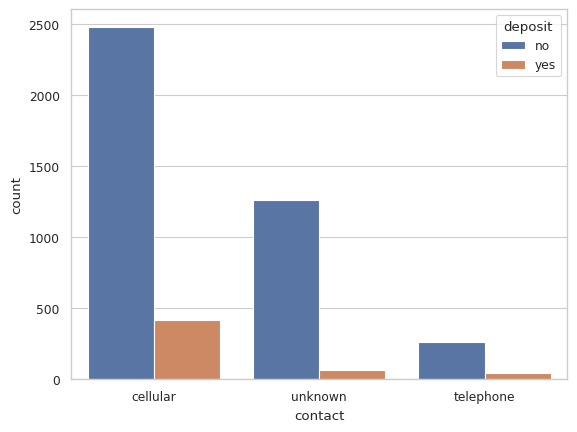

In [ ]:
# Plot da frequência entre Default vs Deposit em percentagem %
sns.countplot(data=df, x = 'contact', hue = 'deposit');

In [ ]:
# Frequência  da contagem de contact
df['balance'].value_counts()

,count
balance,
0,357
2,24
1,15
4,13
5,11
...,...
539,1
1041,1
464,1


In [ ]:
# Contar o número de registros com saldo negativo
num_neg_balance = (df['balance'] < 0).sum()

# Calcular a porcentagem de saldo negativo em relação ao saldo total
total_balance = df['balance'].sum()
neg_balance_percentage = (num_neg_balance / total_balance) * 100

# Contar os valores para a coluna 'month'
month_counts = df['month'].value_counts()

# Exibir os resultados
formatted_neg_balance = f"{neg_balance_percentage:.2f}%"
print(f"Número de registros com saldo negativo: {num_neg_balance}")
print(f"Porcentagem de saldo negativo: {formatted_neg_balance}")
print(month_counts)



Número de registros com saldo negativo: 366
Porcentagem de saldo negativo: 0.01%
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64


A maior frequência de transações de realizar depósitos ocorrem em maio(may) e com menos frequência em dezembro(dec).

In [ ]:
# Frequência  da contagem de poutcom
df['poutcome'].value_counts()

,count
poutcome,
unknown,3705
failure,490
other,197
success,129


 O resultado da ligação para realizar um depósito é, na maioria, desconhecido, em comparação com os casos em que a tentativa de depósito é bem-sucedida ou falha.

In [ ]:
# Contar as ocorrências de 'unknown' em cada coluna do DataFrame
df[df == 'unknown'].count().sort_values(ascending=False)

,0
poutcome,3705
contact,1324
education,187
job,38
month,0
previous,0
pdays,0
campaign,0
duration,0
age,0


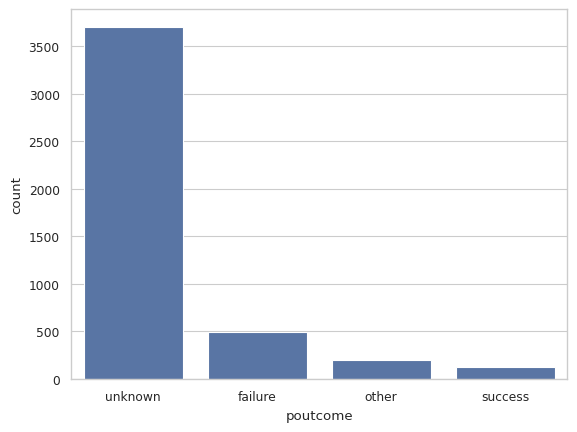

In [ ]:
# Plot da frequência de poutcome
sns.countplot(data=df, x = 'poutcome');

###Verificar a Distribuição / Estatísticas Descritivas"

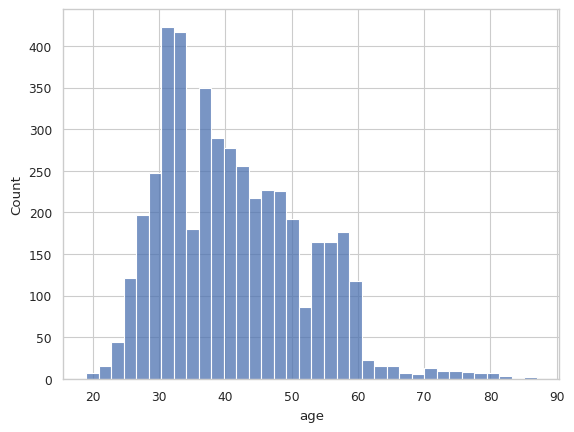

In [ ]:
# Histograma da age
sns.histplot(df['age']);

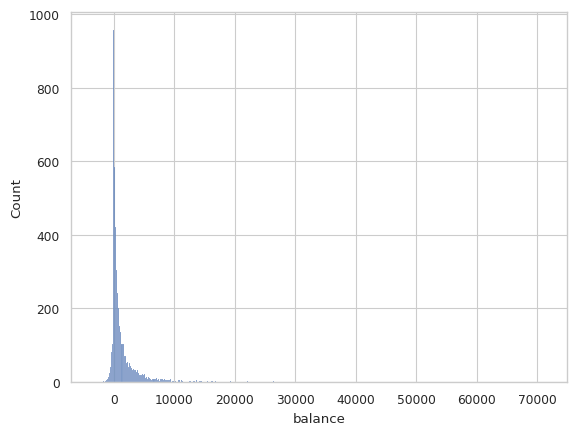

In [ ]:
# Histograma da balance
sns.histplot(df['balance']);

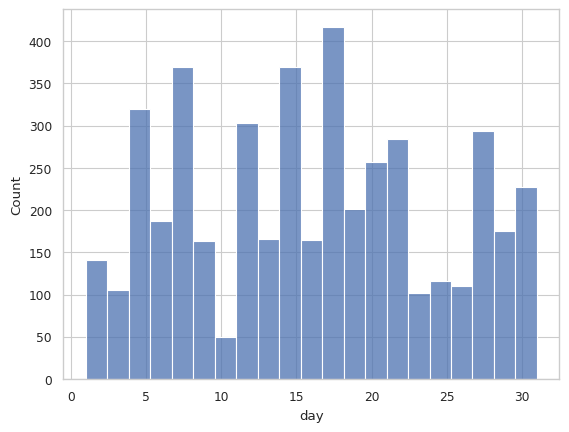

In [ ]:
# Histograma de day
sns.histplot(df['day']);

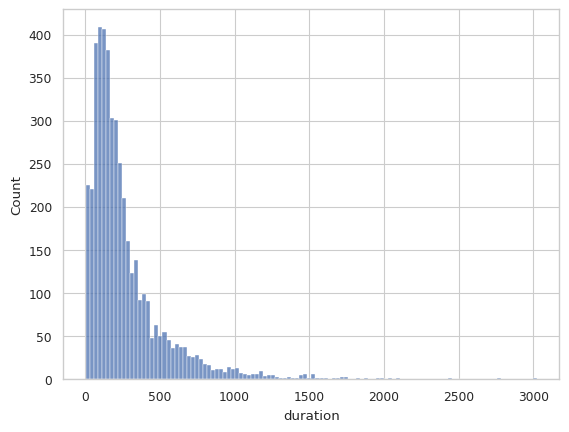

In [ ]:
# Histograma de duration
sns.histplot(df['duration']);

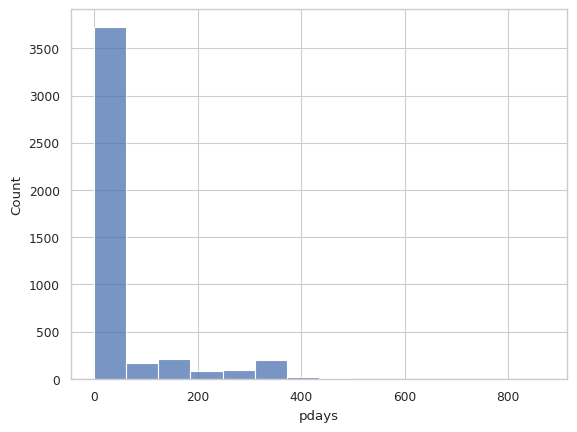

In [ ]:
# Histograma de pdays
sns.histplot(df['pdays']);

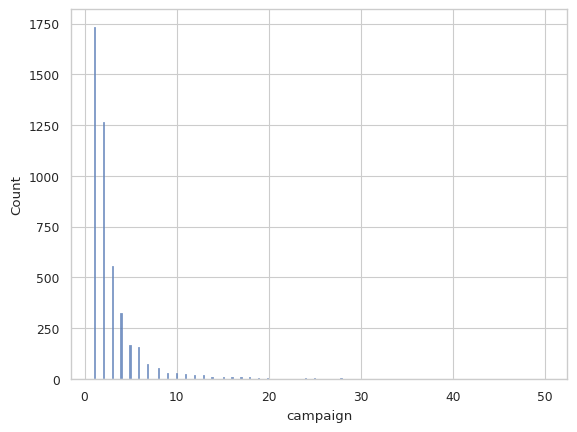

In [ ]:
# Histograma de campaign
sns.histplot(df['campaign']);

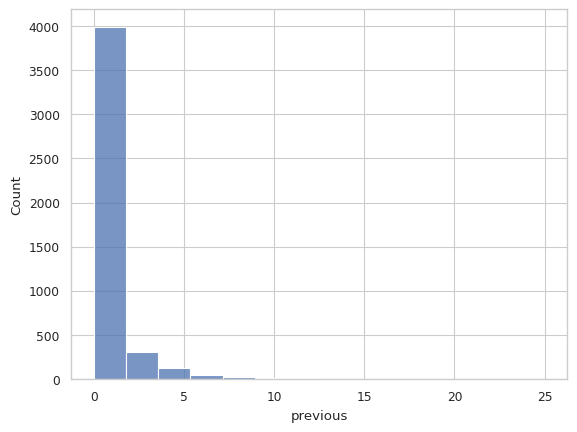

In [ ]:
# Histograma de previous
sns.histplot(df['previous']);

In [ ]:
# Medida de Tendência Central
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#import statistics
import statistics

# Exibir a média e a mediana de 'balance' com 2 casas decimais
print(f"Média do saldo: {statistics.mean(df['balance']):.2f}")
print(f"Mediana do saldo: {statistics.median(df['balance']):.2f}")

# Exibir a média e a mediana de 'duration' com 2 casas decimais
print(f"Média da duração: {statistics.mean(df['duration']):.2f}")
print(f"Mediana da duração: {statistics.median(df['duration']):.2f}")



Média do saldo: 1422.66
Mediana do saldo: 444.00
Média da duração: 263.96
Mediana da duração: 185.00


In [ ]:
import numpy as np

# Medidas de variabilidade para a coluna 'balance'
print(f"Variância do saldo: {np.var(df['balance']):.2f}")
print(f"Desvio padrão do saldo: {np.std(df['balance']):.2f}")
print(f"Amplitude do saldo (máximo - mínimo): {np.max(df['balance']) - np.min(df['balance']):.2f}")
print(f"1º Quartil (25%): {np.quantile(df['balance'], 0.25):.2f}")
print(f"Mediana (50%): {np.quantile(df['balance'], 0.5):.2f}")
print(f"3º Quartil (75%): {np.quantile(df['balance'], 0.75):.2f}")



Variância do saldo: 9055918.23
Desvio padrão do saldo: 3009.31
Amplitude do saldo (máximo - mínimo): 74501.00
1º Quartil (25%): 69.00
Mediana (50%): 444.00
3º Quartil (75%): 1480.00


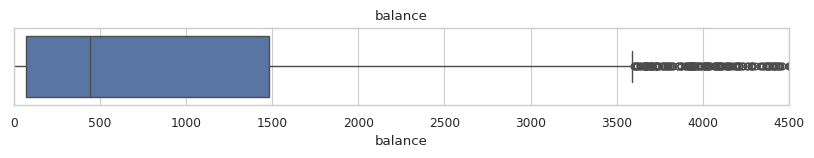

In [ ]:
# Criar um gráfico de boxplot para a variável  balance
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['balance'])
plt.xlim(0, 4500)  # Definir limites do eixo X
plt.title('balance')
plt.xlabel('balance')
plt.show()

### Limpeza de Dados

In [ ]:
# Limpeza de Dados
num_duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")


Número de registros duplicados: 0


In [ ]:
# Verificar valores ausentes
missing_values = df.isna().sum()
print("Valores ausentes em cada coluna:")
print(missing_values)


Valores ausentes em cada coluna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
# Alterar tipo de dados
df["balance"] = df["balance"].astype("float64")
print("Tipo de dado de 'balance' alterado para:", df["balance"].dtype)


Tipo de dado de 'balance' alterado para: float64


In [ ]:
# Exibir informações gerais sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  deposit    4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


In [ ]:
# Calcular o IQR (Intervalo Interquartil) para a coluna 'balance'
q1 = df["balance"].quantile(0.25)
q3 = df["balance"].quantile(0.75)

iqr = q3 - q1  # Intervalo interquartil
fence_low = q1 - 1.5 * iqr  # Limite inferior
fence_high = q3 + 1.5 * iqr  # Limite superior

# Identificar os outliers
outliers = df.loc[(df["balance"] < fence_low) | (df["balance"] > fence_high)]

# Exibir os outliers
print("Outliers encontrados:")
print(outliers)


Outliers encontrados:
      age            job   marital  education default  balance housing loan  \
1      33       services   married  secondary      no   4789.0     yes  yes   
10     39       services   married  secondary      no   9374.0     yes   no   
16     56     technician   married  secondary      no   4073.0      no   no   
25     41     management   married   tertiary      no   5883.0      no   no   
30     68        retired  divorced  secondary      no   4189.0      no   no   
...   ...            ...       ...        ...     ...      ...     ...  ...   
4464   53       services  divorced  secondary      no   4554.0      no   no   
4473   33     technician   married  secondary      no   4790.0     yes   no   
4489   45     management   married   tertiary      no   6945.0      no   no   
4500   38         admin.   married  secondary      no   4196.0     yes   no   
4517   57  self-employed   married   tertiary     yes  -3313.0     yes  yes   

        contact  day month  d

In [ ]:
# Tratar outliers usando IQR
df_clean = df.loc[(df["balance"] >= fence_low) & (df["balance"] <= fence_high)]

# Exibir o DataFrame limpo (sem outliers)
print("DataFrame após tratamento dos outliers:")
print(df_clean)


DataFrame após tratamento dos outliers:
      age           job  marital  education default  balance housing loan  \
0      30    unemployed  married    primary      no   1787.0      no   no   
2      35    management   single   tertiary      no   1350.0     yes   no   
3      30    management  married   tertiary      no   1476.0     yes  yes   
4      59   blue-collar  married  secondary      no      0.0     yes   no   
5      35    management   single   tertiary      no    747.0      no   no   
...   ...           ...      ...        ...     ...      ...     ...  ...   
4515   32      services   single  secondary      no    473.0     yes   no   
4516   33      services  married  secondary      no   -333.0     yes   no   
4518   57    technician  married  secondary      no    295.0      no   no   
4519   28   blue-collar  married  secondary      no   1137.0      no   no   
4520   44  entrepreneur   single   tertiary      no   1136.0     yes  yes   

       contact  day month  duration

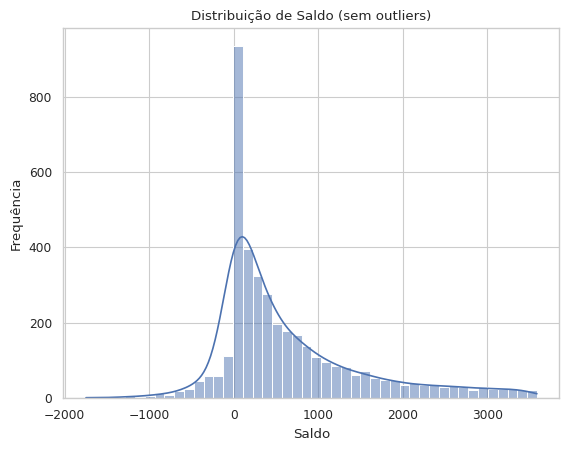

In [ ]:
# Criar histograma com linha de densidade (KDE) para a coluna 'balance' no DataFrame limpo
sns.histplot(df_clean['balance'], kde=True)

# Exibir o gráfico
plt.title('Distribuição de Saldo (sem outliers)')
plt.xlabel('Saldo')
plt.ylabel('Frequência')
plt.show()


Análise Exploratória de Dados (AED)

In [ ]:
# Definir os tipos de dados para variáveis numéricas e categóricas
num_dtypes = ["int32", "int64", "float32", "float64"]
cate_dtypes = ["object"]

# Separar as variáveis numéricas e categóricas
df_num = df_clean.select_dtypes(include=num_dtypes)
df_cate = df_clean.select_dtypes(include=cate_dtypes)

# Obter os nomes das colunas numéricas e categóricas
num_cols = df_num.columns
cate_cols = df_cate.columns

# Exibir as colunas numéricas e categóricas
print("Colunas numéricas:", num_cols)
print("Colunas categóricas:", cate_cols)



Colunas numéricas: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Colunas categóricas: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


###Análise Univariada

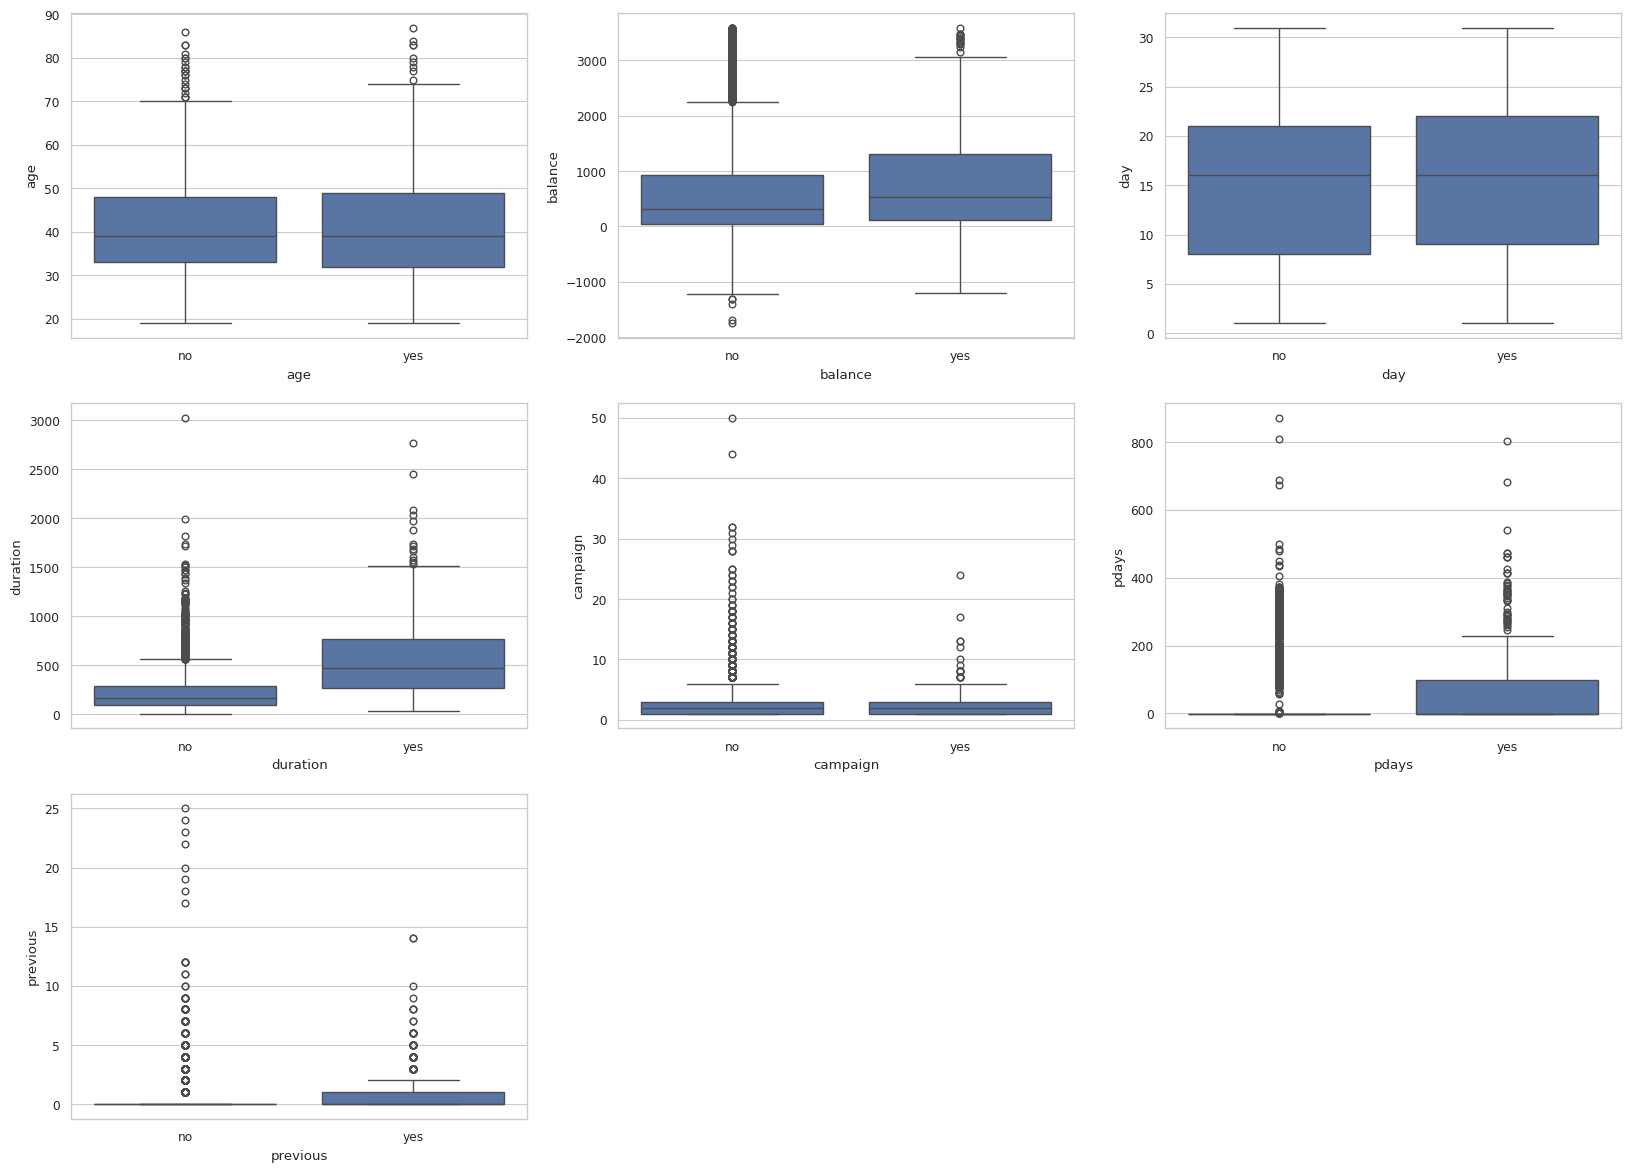

In [ ]:
# Configuração do tamanho da figura e cor de fundo
plt.figure(figsize=(20, 60), facecolor='white')

# Inicializar o número do gráfico
plotnumber = 1

# Criar boxplots para cada variável numérica em relação a 'deposit'
for feature in num_cols:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x="deposit", y=feature, data=df_clean)  # Usar diretamente a coluna 'feature'
    plt.xlabel(feature)
    plotnumber += 1

# Exibir o gráfico
plt.show()


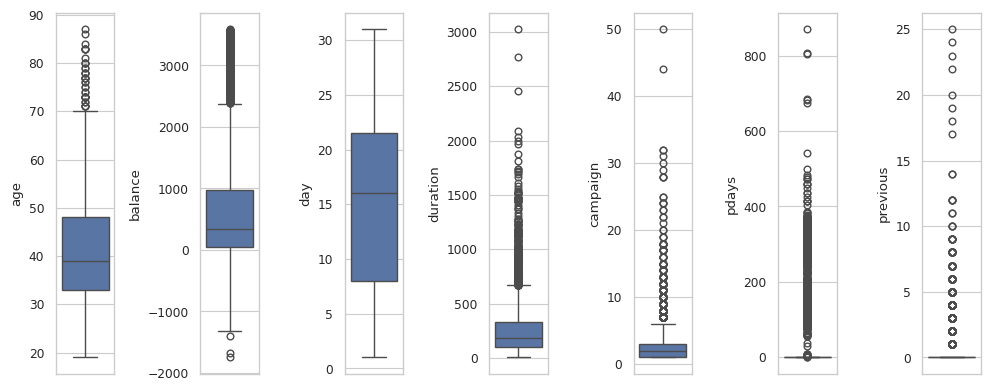

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 4))

# Criar boxplots para cada variável numérica
for i in range(len(num_cols)):
    plt.subplot(1, len(num_cols), i + 1)  # Organizar os gráficos em uma linha
    sns.boxplot(df_clean[num_cols[i]], orient="v")  # Boxplot vertical
    plt.tight_layout()  # Ajustar layout para evitar sobreposição

# Exibir os gráficos
plt.show()


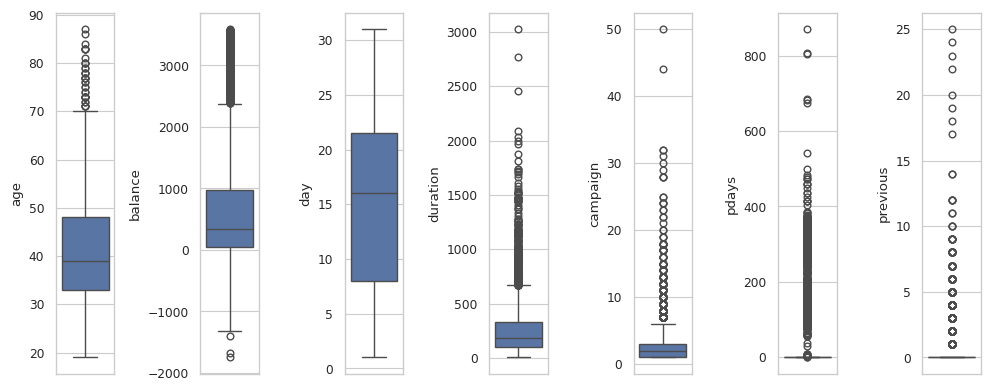

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 4))

# Criar boxplots para cada variável numérica
for i in range(len(num_cols)):
    plt.subplot(1, len(num_cols), i + 1)  # Organizar os gráficos em uma linha
    sns.boxplot(df_clean[num_cols[i]], orient="v")  # Boxplot vertical
    plt.tight_layout()  # Ajustar layout para evitar sobreposição

# Exibir os gráficos
plt.show()


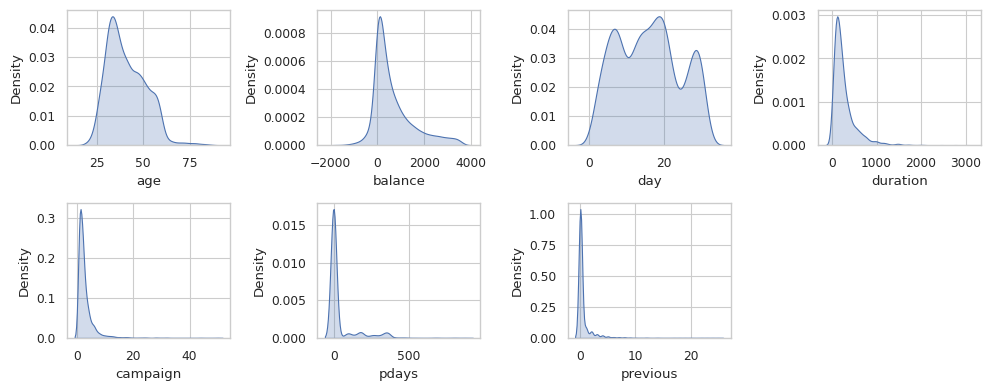

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 4))

# Criar gráficos KDE para cada variável numérica
for i in range(len(num_cols)):
    plt.subplot(2, 4, i + 1)  # Organizar os gráficos em 2 linhas e 4 colunas
    sns.kdeplot(df_clean[num_cols[i]], fill=True)  # Usar fill=True em vez de shade=True
    plt.tight_layout()  # Ajustar layout para evitar sobreposição

# Exibir os gráficos
plt.show()


Parece que as variáveis age e day seguem uma distribuição normal. Já as variáveis balance, duration, campaign, pdays e previous estão fortemente assimétricas à esquerda e parecem conter alguns outliers.

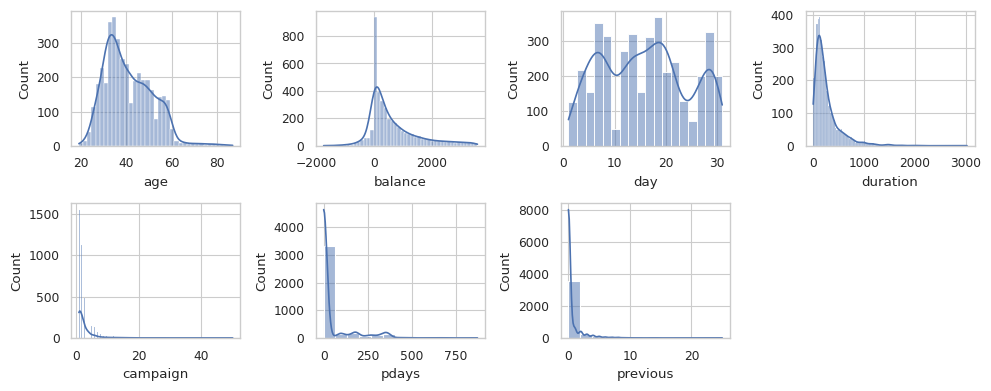

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 4))

# Criar histogramas para cada variável numérica
for i in range(len(num_cols)):
    plt.subplot(2, 4, i + 1)  # Organizar os gráficos em 2 linhas e 4 colunas
    sns.histplot(df_clean[num_cols[i]], kde=True)  # Incluir linha de densidade (KDE)
    plt.tight_layout()  # Ajustar layout para evitar sobreposição

# Exibir os gráficos
plt.show()


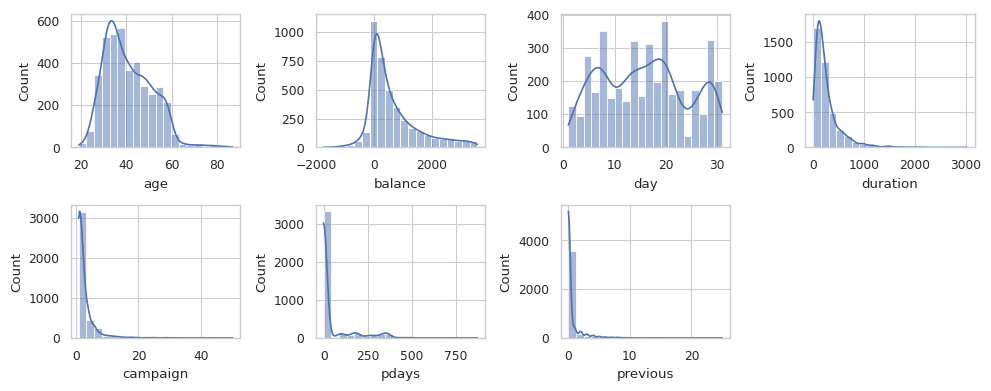

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 4))

# Número de bins a ser utilizado
num_bins = 20  # Exemplo de número de bins

# Criar histogramas para cada variável numérica
for i in range(len(num_cols)):
    plt.subplot(2, 4, i + 1)  # Organizar os gráficos em 2 linhas e 4 colunas
    sns.histplot(df_clean[num_cols[i]], bins=num_bins, kde=True)  # Aplicar binning
    plt.tight_layout()  # Ajustar layout para evitar sobreposição

# Exibir os gráficos
plt.show()


In [ ]:
# Exibir a descrição estatística da coluna 'balance'
df_num['balance'].describe()


,balance
count,4015.000000
mean,645.734496
std,869.797049
min,-1746.000000
25%,44.000000
50%,340.000000
75%,978.500000
max,3587.000000


###Análise Multivariada

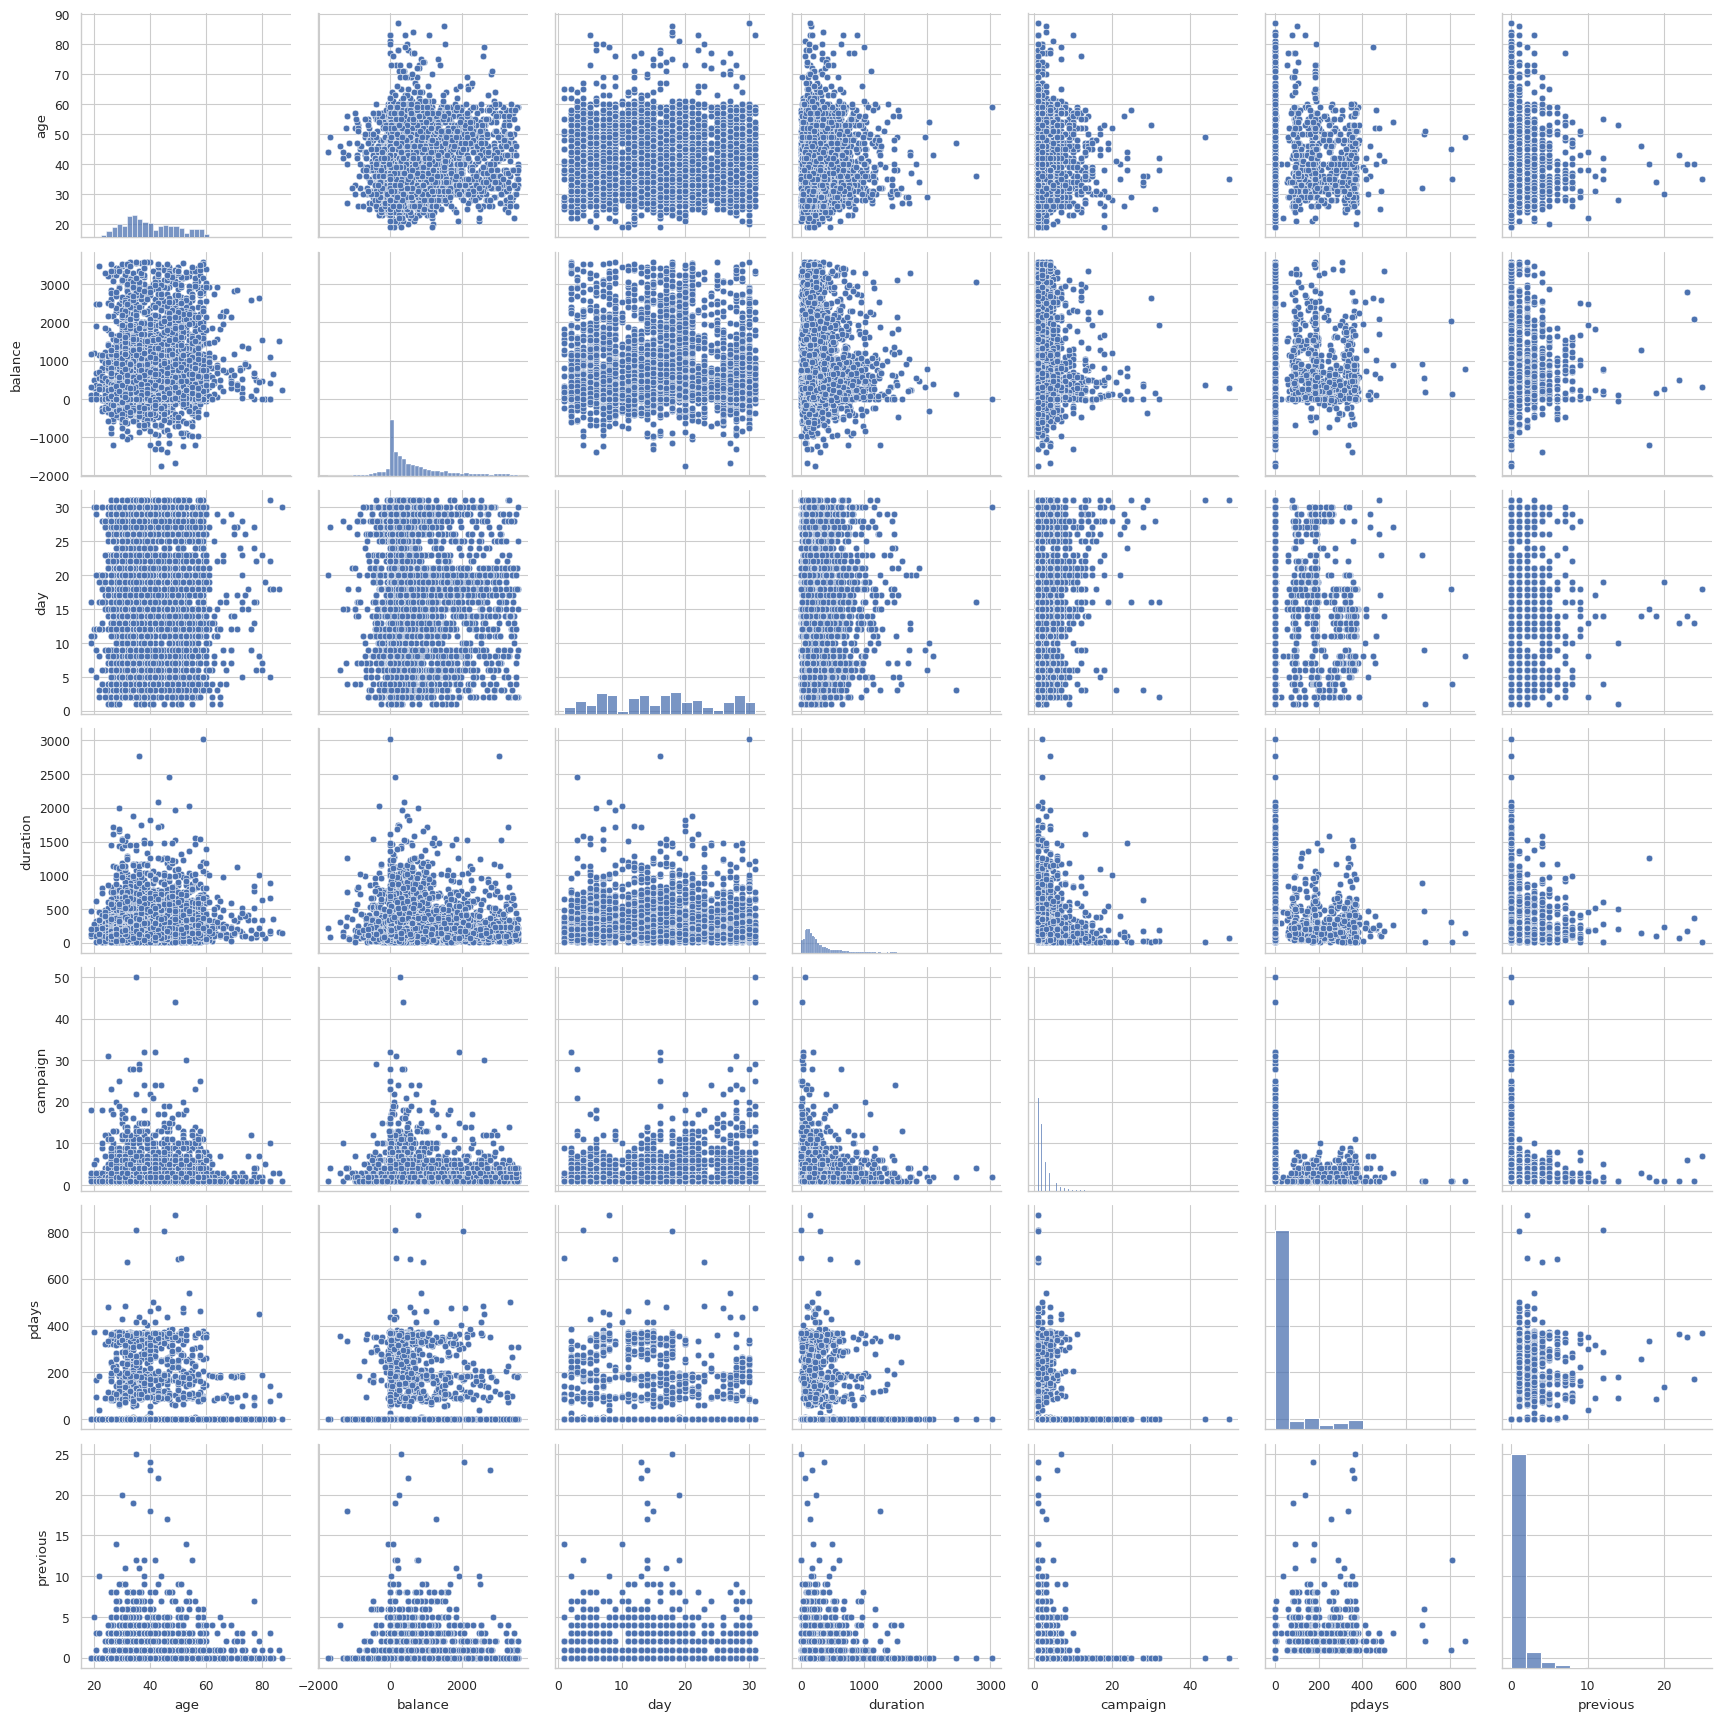

In [ ]:
# Criar o pairplot para todas as combinações de variáveis numéricas
sns.pairplot(df_clean[num_cols])

# Exibir o gráfico
plt.show()



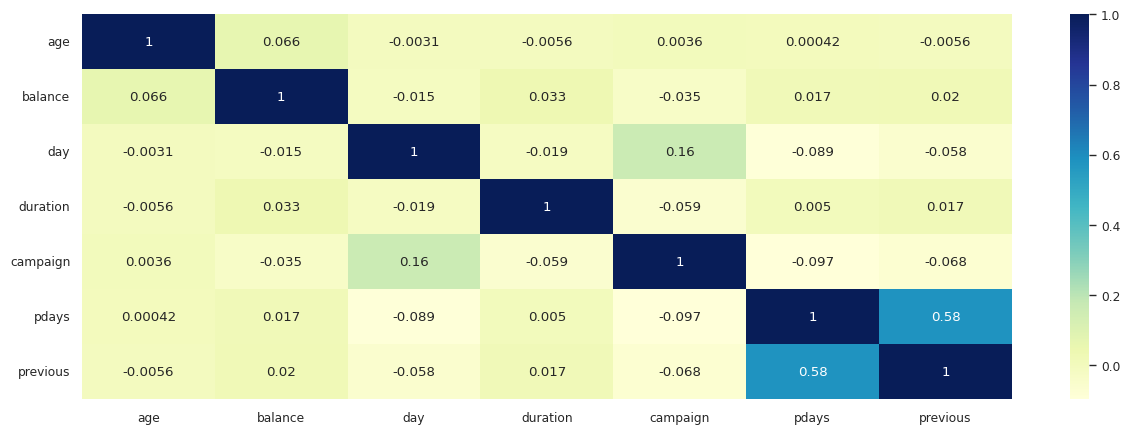

In [ ]:
# Criar o gráfico e ajustar o tamanho
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

# Gerar o heatmap da matriz de correlação entre as variáveis numéricas
sns.heatmap(df_clean[num_cols].corr(), cmap="YlGnBu", annot=True)

# Exibir o gráfico
plt.show()


Parece que nenhuma variável está fortemente correlacionada com outras variáveis.

Isso indica que as variáveis numéricas no conjunto de dados possuem correlações fracas entre si, o que pode ser útil para evitar multicolinearidade em modelos de aprendizado de máquina. Além disso, essa falta de forte correlação entre as variáveis pode sugerir que o comportamento de uma variável não depende significativamente das outras variáveis no modelo.

In [ ]:
# Criar uma tabela de contingência entre 'job' e 'deposit'
print(pd.crosstab(df_clean['job'], df_clean['deposit']))


deposit         no  yes
job                    
admin.         385   46
blue-collar    808   65
entrepreneur   136   14
housemaid       83   10
management     721  113
retired        144   41
self-employed  141   17
services       344   35
student         57   17
technician     614   72
unemployed     106   13
unknown         27    6


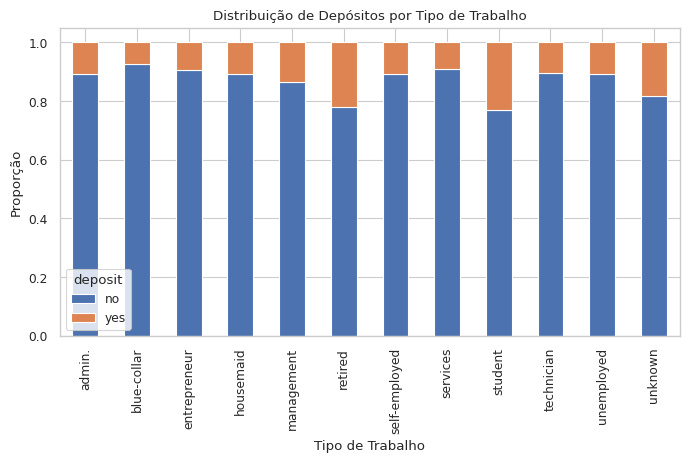

In [ ]:
# Criar uma tabela de contingência entre 'job' e 'deposit'
job = pd.crosstab(df_clean['job'], df_clean['deposit'])

# Normalizar a tabela para representar a distribuição por tipo de trabalho
job_norm = job.div(job.sum(1).astype(float), axis=0)

# Plotar um gráfico de barras empilhadas
job_norm.plot.bar(stacked=True, figsize=(8, 4))
plt.title('Distribuição de Depósitos por Tipo de Trabalho')
plt.xlabel('Tipo de Trabalho')
plt.ylabel('Proporção')
plt.show()


In [ ]:
# Exibir as primeiras 5 linhas do DataFrame df_clean
df_clean.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747.0,no,no,cellular,23,feb,141,2,176,3,failure,no


In [ ]:
# Exibir informações gerais sobre o DataFrame df_clean
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4015 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4015 non-null   int64  
 1   job        4015 non-null   object 
 2   marital    4015 non-null   object 
 3   education  4015 non-null   object 
 4   default    4015 non-null   object 
 5   balance    4015 non-null   float64
 6   housing    4015 non-null   object 
 7   loan       4015 non-null   object 
 8   contact    4015 non-null   object 
 9   day        4015 non-null   int64  
 10  month      4015 non-null   object 
 11  duration   4015 non-null   int64  
 12  campaign   4015 non-null   int64  
 13  pdays      4015 non-null   int64  
 14  previous   4015 non-null   int64  
 15  poutcome   4015 non-null   object 
 16  deposit    4015 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 564.6+ KB


In [ ]:
# Exibir uma amostra aleatória de 5 valores da coluna 'poutcome'
df_clean['poutcome'].sample(5)


,poutcome
2051,unknown
2849,failure
2212,failure
4185,unknown
3534,failure


In [ ]:
# Exibir as primeiras 5 linhas do DataFrame df_result
df_result.head()


,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787.0,19,79,1,-1,0,no,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35,1350.0,16,185,1,330,1,no,False,False,...,False,False,False,False,False,False,True,False,False,False
3,30,1476.0,3,199,4,-1,0,no,False,False,...,True,False,False,False,False,False,False,False,False,True
4,59,0.0,5,226,1,-1,0,no,False,True,...,False,False,True,False,False,False,False,False,False,True
5,35,747.0,23,141,2,176,3,no,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Exibir a coluna 'deposit' do DataFrame df_result
df_result['deposit']


,deposit
0,no
2,no
3,no
4,no
5,no
...,...
4515,no
4516,no
4518,no
4519,no


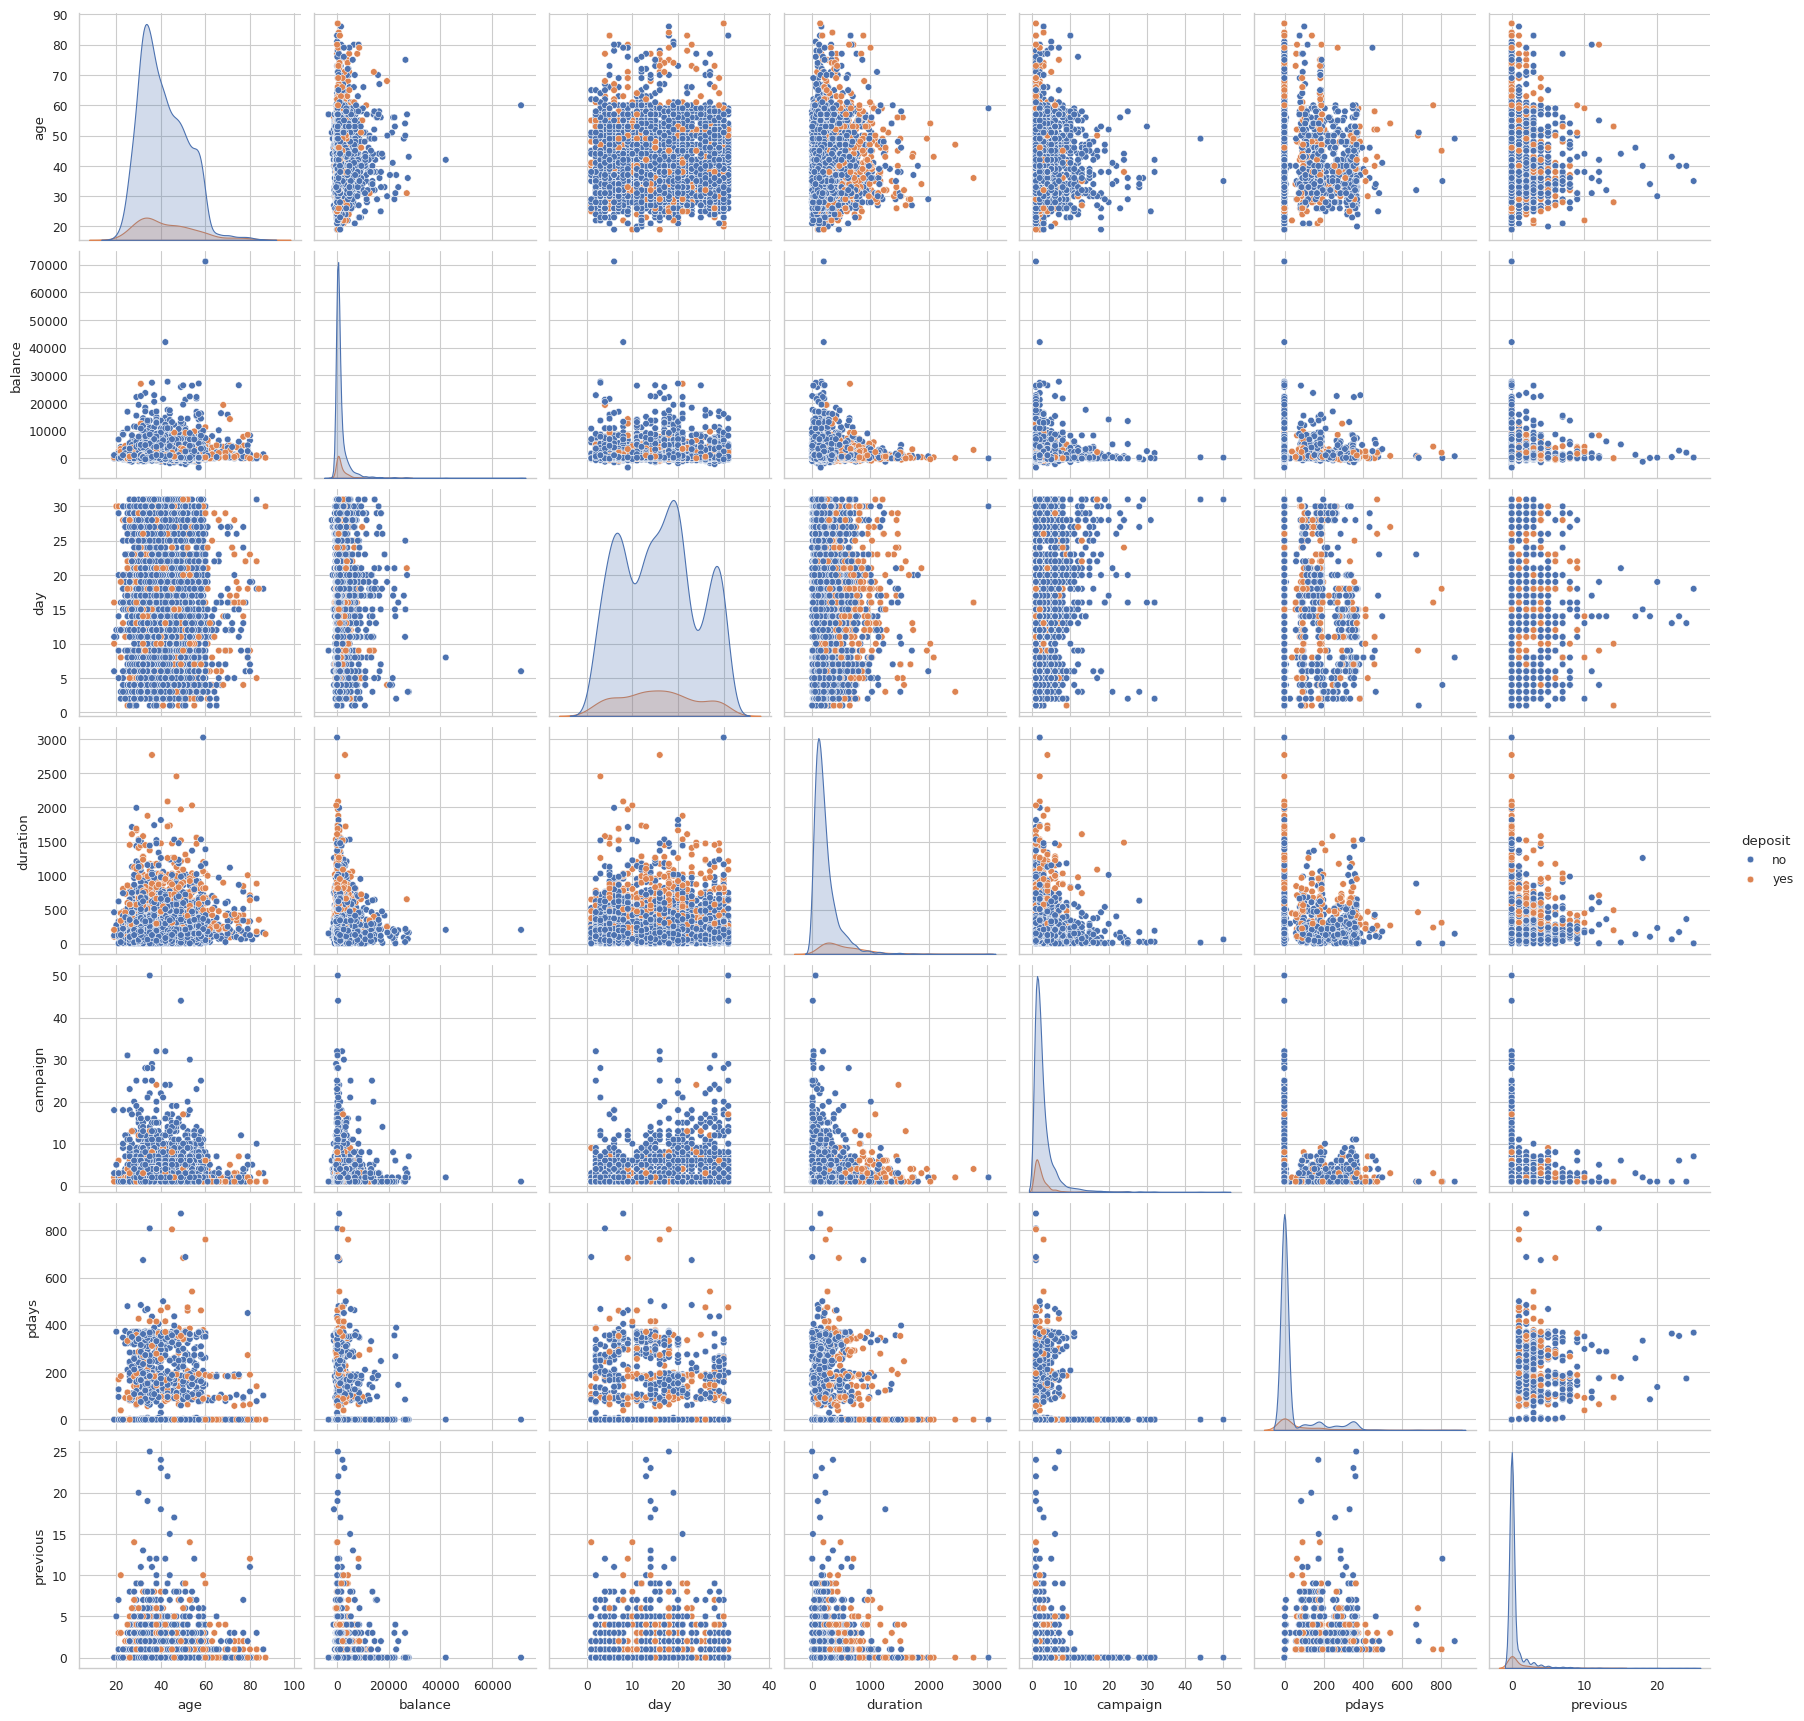

In [ ]:
cols= ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit']

sns.pairplot(data=df[cols], hue='deposit')

### As Variáveis

Vamos ver as correlações entre as variáveis. Desta vez, porém, criaremos uma matriz de correlação com todas as variáveis.

####Correlação

In [ ]:
# Selecionando apenas as colunas numéricas do DataFrame.
numeric_df = df.select_dtypes(include=np.number)

# Calculando a matriz de correlação
corr = numeric_df.corr().round(2)

# Exibindo a matriz de correlação
corr


,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.08,-0.02,-0.00,-0.01,-0.01,-0.00
balance,0.08,1.00,-0.01,-0.02,-0.01,0.01,0.03
day,-0.02,-0.01,1.00,-0.02,0.16,-0.09,-0.06
duration,-0.00,-0.02,-0.02,1.00,-0.07,0.01,0.02
campaign,-0.01,-0.01,0.16,-0.07,1.00,-0.09,-0.07
pdays,-0.01,0.01,-0.09,0.01,-0.09,1.00,0.58
previous,-0.00,0.03,-0.06,0.02,-0.07,0.58,1.00


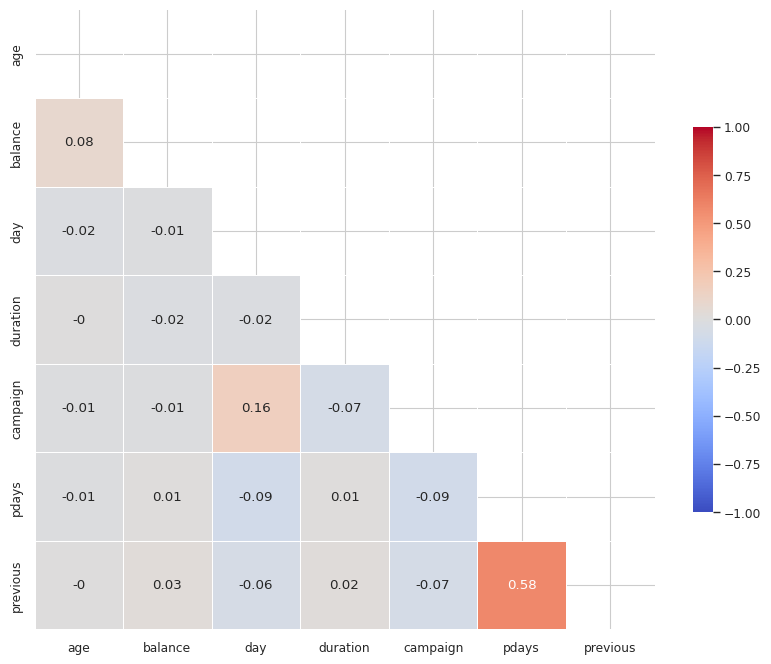

In [ ]:
# Selecionar apenas as colunas numéricas do DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação e arredondar para duas casas decimais
corr = numeric_df.corr().round(2)

# Criar uma matriz de zeros com o mesmo formato da matriz de correlação
mask = np.zeros_like(corr, dtype=bool)

# Marcar a parte superior da matriz de correlação como True na máscara
mask[np.triu_indices_from(mask)] = True

# Configurar a figura do Matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Criar o mapa de calor (heatmap)
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)

# Mostrar o gráfico
plt.show()


##Construção do Modelo de Regressão Logística

###Divisão dos dados em treino e teste.

In [ ]:
# Dividir os dados em conjuntos de treino e teste
# 'x': Variáveis independentes (features)
# 'y': Variável dependente (target)
x = df.drop(['deposit'], axis=1)  # Remover a coluna 'deposit' das features
y = df['deposit']  # Selecionar a coluna 'deposit' como o target

# Divisão do conjunto de dados
# - test_size=0.3: 30% dos dados para teste, 70% para treino
# - random_state=42: Garante reprodutibilidade ao fixar a semente do gerador aleatório
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Resultado:
# - x_train, y_train: Conjunto de treino (70% dos dados)
# - x_test, y_test: Conjunto de teste (30% dos dados)


NameError: name 'df' is not defined

In [ ]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2398,51,entrepreneur,married,secondary,yes,-2082.0,no,yes,cellular,28,jul,123,6,-1,0,unknown
800,50,management,married,tertiary,no,2881.0,no,no,cellular,5,aug,510,2,2,5,other
2288,50,technician,married,secondary,no,1412.0,no,no,cellular,6,aug,131,3,-1,0,unknown
2344,37,management,married,tertiary,no,0.0,yes,no,unknown,3,jun,247,13,-1,0,unknown
3615,31,admin.,single,secondary,no,757.0,no,no,cellular,3,feb,343,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,45,management,divorced,tertiary,no,959.0,no,no,unknown,18,jun,74,1,-1,0,unknown
554,43,technician,single,secondary,no,11269.0,no,no,unknown,29,may,92,1,-1,0,unknown
1159,31,management,single,tertiary,no,62.0,yes,no,cellular,18,may,175,1,293,5,failure
1213,49,self-employed,married,secondary,no,2576.0,yes,no,cellular,15,may,64,6,-1,0,unknown


In [ ]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4153,42,technician,married,secondary,no,440.0,yes,no,cellular,3,feb,13,5,-1,0,unknown
2085,33,blue-collar,married,secondary,no,-77.0,yes,no,cellular,28,jul,151,3,-1,0,unknown
1891,32,management,single,tertiary,no,656.0,yes,yes,cellular,20,apr,148,2,-1,0,unknown
3611,28,technician,single,secondary,no,389.0,yes,no,cellular,11,may,15,7,-1,0,unknown
4015,36,technician,married,secondary,no,5902.0,yes,no,unknown,23,may,219,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,admin.,married,tertiary,no,1536.0,no,no,cellular,4,may,54,2,-1,0,unknown
466,34,self-employed,married,secondary,no,-370.0,yes,no,unknown,21,may,748,1,-1,0,unknown
3092,46,management,married,tertiary,no,523.0,yes,no,cellular,6,may,105,4,366,2,failure
3772,47,management,single,tertiary,no,440.0,no,no,cellular,21,aug,71,4,-1,0,unknown


Agora que dividimos o nosso dataset de forma apropriada, vamos anotar a fórmula a ser usada para a regressão logística.

In [ ]:
#Criar o modelo  de variáveis relevantes
cols = df.columns.drop('deposit')
formula = 'deposit ~ ' + ' + '.join(cols)
print(formula, '\n')

deposit ~ age + job + marital + education + default + balance + housing + loan + contact + day + month + duration + campaign + pdays + previous + poutcome 



A fórmula inclui todas as variáveis que foram selecionadas na etapa final da secção anterior. De seguida, iremos executar a regressão logística com esta fórmula e analisar os resultados.

Na regressão logística, utilizamos a distribuição binomial no parâmetro family, uma vez que, devido à natureza binária da variável alvo (0 ou 1), estamos interessados em modelar a probabilidade de ocorrência de um dos dois resultados possíveis (deposito a prazo, no caso de 0 é 'no',  no caso de 1 é 'yes'). Isto está alinhado com a distribuição binomial, que descreve eventos binários deste tipo.

In [ ]:
 # Ajustar o  modelo de regressão logística

model = smf.glm(formula=formula, data=x_train.join(y_train), family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['deposit[no]', 'deposit[yes]']   No. Observations:                 3164
Model:                                         GLM   Df Residuals:                     3121
Model Family:                             Binomial   Df Model:                           42
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -732.32
Date:                             Mon, 13 Jan 2025   Deviance:                       1464.6
Time:                                     15:44:58   Pearson chi2:                 2.53e+03
No. Iterations:                                  7   Pseudo R-squ. (CS):             0.2269
Covariance Type:                         nonrobust                                         
                             coef    std err          z      P>|z|      [0.025  

Reparem como algumas variáveis são irrelevantes para o modelo — todas as que têm um p-valor superior a 0,05 seriam inúteis (como age, balance, day, pdays,etc).

###Modelo completo

Neste modelo, uma probabilidade de 1 corresponde à classe "faz deposito a prazo", enquanto uma probabilidade de 0 corresponde à classe "não subscrição". Portanto, podemos aplicar um valor limite de 0,5 às nossas previsões, atribuindo a todos os valores mais próximos de 0 um rótulo de "no" e atribuindo a todos os valores mais próximos de 1 um rótulo de "yes".

Em resumo, o que queremos fazer é:

1- Previsão de Probabilidades:

O modelo de regressão logística gera uma probabilidade para cada instância.

Por exemplo, se para uma instância a probabilidade gerada for 0.89, isso significa que há 89% de chance de a instância ser classificada como "Subscrição" (yes).

2- Definição de um Limite (Threshold):

Comumente, utilizamos um limite de 0.5 para converter a probabilidade em uma previsão binária:

Probabilidade ≥ 0.5: A instância é prevista como "Subscrição" (yes).
Probabilidade < 0.5: A instância é prevista como "não Subscrição" (no).
3- Comparação com os Rótulos Reais:

Depois de converter a probabilidade numa previsão binária, comparamos essa previsão com o rótulo real da instância nos dados de teste para avaliar a precisão do modelo.
Vamos agora aplicar o modelo nos dados de teste (somente nas variaveis independentes) para comparar as previsões obtidas com o y_test.



In [ ]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(x_test) #nao estou passando o y de test
predictions

#0.99 -> 99% de chance de ser no -> portanto, 1% de chance de ser não Subscrição
#0.3 -> 30% de chance de ser yes -> portanto, 70% de chance de ser Subscrição

,0
2398,0.983424
800,0.624011
2288,0.969002
2344,0.975578
3615,0.812308
...,...
2600,0.944139
554,0.991890
1159,0.942645
1213,0.986191


Como podemos ver os valores acima são numéricos. Estas probabilidades devem ainda ser convertidas em valores nominais, isto é, nos nossos rotulos (yes ou no). Vamos utilizar o valor limite, discutido acima para classificar os dados de acordo com os rótulos.

In [ ]:
# if gratter than 0.5 then no
# if lower than 0.5 then yes

predictions_nominal = [ "no" if x < 0.5 else "yes" for x in predictions]
predictions_nominal

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',



Podemos confirmar que as probabilidades mais próximas de 0 foram rotuladas como "no", enquanto as mais próximas de 1 foram rotuladas como "yes". Agora podemos avaliar a precisão de nossas previsões verificando o relatório de classificação e a matriz de confusão.

###Avaliação do desempenho do modelo (matriz de confusão).

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

cfm = confusion_matrix(y_test, predictions_nominal)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal)
accuracy = accuracy_score(y_test, predictions_nominal)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')

Confusion Matrix: 
 [[  37 1168]
 [  51  101]] 

True Negative: 37
False Positive: 1168
False Negative: 51
True Positive: 101
Balanced accuracy: 
 0.34758953920069885 

Accuracy: 
 0.1016949152542373 

Sensitivity: 
 0.6644736842105263 

Especificidade: 
 0.030705394190871368 



Matriz de Confusão

True Negative (TN): 37 (previsões corretas de classe negativa)

False Positive (FP): 1168 (previsões incorretas de classe positiva).

False Negative (FN): 51 (previsões incorretas de classe negativa).

True Positive (TP): 101 (previsões corretas de classe positiva).

Métricas de Avaliação
Balanced Accuracy: 0.3476 (~34.8%)

Média da sensibilidade e especificidade.

Um valor baixo, indicando que o modelo está muito distante de uma classificação equilibrada entre as classes

Accuracy (Acurácia): 0.1017 (~10.2%)
Porcentagem geral de previsões corretas.

A acurácia é muito baixa, o que sugere que o modelo tem dificuldade em classificar corretamente os dados.

Sensitivity (Sensibilidade): 0.6645 (~66.4%)
Também chamada de recall para a classe positiva.

O modelo identifica corretamente uma boa parte dos casos positivos.
Especificidade: 0.0307 (~3.1%)
Habilidade de prever corretamente os casos negativos.
Muito baixa, indicando que o modelo classifica erroneamente a maioria dos casos negativos como positivos.



### Modelo sem variáveis que não são importantes

Agora, as variáveis em que o p_value era maior que 0.05 quando avaliamos o modelo? Vamos desconsidera-las e vamos analisar o novo modelo a partir das variáveis restantes.

In [ ]:
# Eliminating Unimportant Variables
cols2 = df.columns.drop(['deposit','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'pdays','previous', 'poutcome'])
formula2 = 'deposit ~ ' + ' + '.join(cols2)
print(formula2, '\n')

# run new model
model2 = smf.glm(formula=formula2, data=x_train.join(y_train), family=sm.families.Binomial())
logistic_fit2 = model2.fit()
print(logistic_fit2.summary())

deposit ~ duration + campaign 

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['deposit[no]', 'deposit[yes]']   No. Observations:                 3164
Model:                                         GLM   Df Residuals:                     3161
Model Family:                             Binomial   Df Model:                            2
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -932.40
Date:                             Mon, 13 Jan 2025   Deviance:                       1864.8
Time:                                     15:19:37   Pearson chi2:                 2.75e+03
No. Iterations:                                  6   Pseudo R-squ. (CS):             0.1227
Covariance Type:                         nonrobust                                         
                 coef    std err          z     

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

predictions2 = logistic_fit2.predict(x_test) #nao estou passando o y de test
predictions_nominal2 = [ "no" if x < 0.5 else "yes" for x in predictions2]

cfm = confusion_matrix(y_test, predictions_nominal2)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal2)
accuracy = accuracy_score(y_test, predictions_nominal2)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0


print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)


print('Confusion Matrix: \n', cfm, '\n')
print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')

True Negative: 30
False Positive: 1175
False Negative: 27
True Positive: 125
Confusion Matrix: 
 [[  30 1175]
 [  27  125]] 

Balanced accuracy: 
 0.42363234330639876 

Accuracy: 
 0.11422254974207811 

Sensitivity: 
 0.8223684210526315 

Especificidade: 
 0.024896265560165973 



Desempenho desbalanceado: O modelo tem um bom desempenho na detecção de casos positivos (alta sensibilidade), mas está a fracassar em identificar corretamente os casos negativos (baixa especificidade).
Impacto dos Falsos Positivos: O modelo gera um número muito alto de falsos positivos (1175), o que pode ser prejudicial, dependendo do contexto.
Acurácia baixa: A baixa acurácia geral (11.4%) sugere que o modelo precisa ser ajustado.